# Deep Learning Project: Fashion-MNIST Image Classification


## Data Collection and Provenance


For this project, I will use the Fashion-MNIST dataset, a well-known dataset provided by Zalando Research (Zalando is an online fashion company in Germany). It consists of 70,000 grayscale images of fashion products, each labeled with one of 10 categories. The dataset is split into:
- Training Set: 60,000 images
- Test Set: 10,000 images

Each image is 28x28 pixels, and the dataset is designed to be a direct drop-in replacement for the original MNIST dataset of handwritten digits.

**Data Access**

We can download the dataset directly in Python using TensorFlow’s tf.keras.datasets module. This ensures ease of access and integration with deep learning frameworks.

## Deep Learning Problem Description


**Problem Statement**

The objective is to build a model that can classify fashion items into one of the 10 categories:
- T-shirt/top
- Trouser
- Pullover
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot

This is a multi-class classification problem.

**Approach**

I will explore and compare multiple models:

1. Baseline Model: A simple feedforward neural network.
2. Convolutional Neural Network (CNN): To capture spatial features.
3. CNN with Data Augmentation: To improve generalization.
4. Transfer Learning Model: Using a pre-trained model like MobileNetV2.

The goal is to understand how each model performs and why certain models outperform others.

## Exploratory Data Analysis (EDA)
#### Data Loading

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Lambda
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

#### Understanding the Data

In [3]:
# Shape and Type
print('Training data shape:', X_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [4]:
# Data Types
print('Data type of X_train:', X_train.dtype)
print('Data type of y_train:', y_train.dtype)

Data type of X_train: uint8
Data type of y_train: uint8


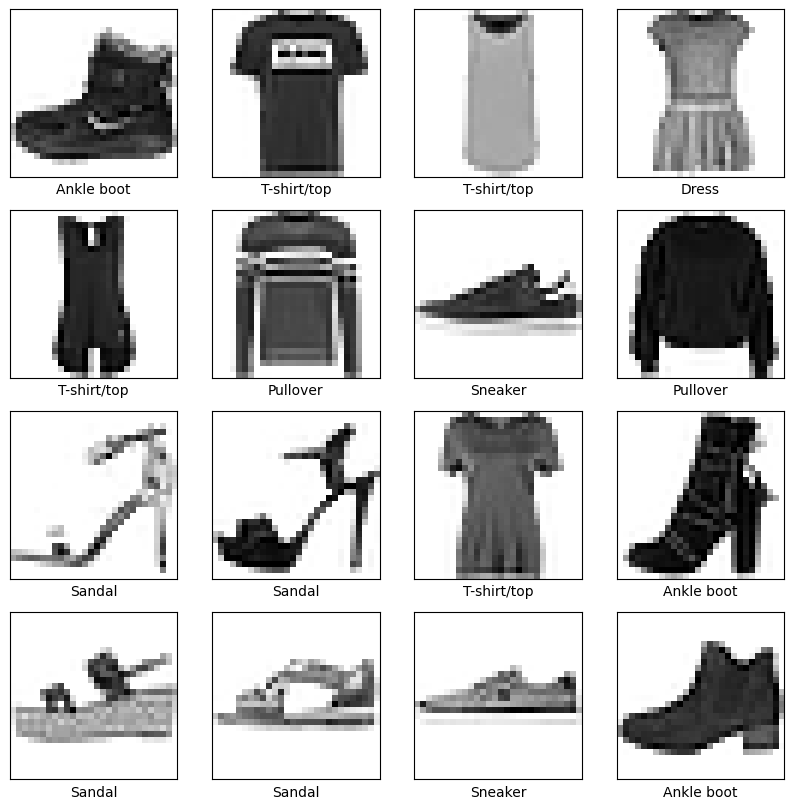

In [5]:
# Visualizing the Data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_sample_images(X, y, class_names):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[y[i]])
    plt.show()

plot_sample_images(X_train, y_train, class_names)

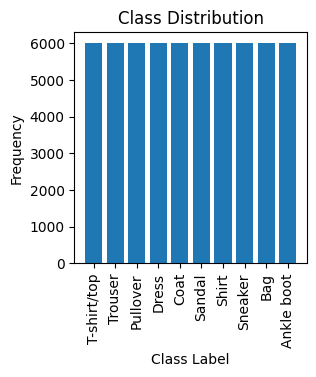

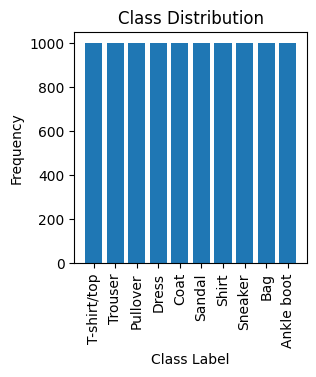

The dataset is balanced across all classes


In [28]:
# Class Distribution

# Training data class distribution
plt.figure(figsize=(3,3))
_, counts = np.unique(y_train, return_counts=True)
plt.bar(class_names, counts)
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Test data class distribution
plt.figure(figsize=(3,3))
_, counts = np.unique(y_test, return_counts=True)
plt.bar(class_names, counts)
plt.title('Class Distribution')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

print('The dataset is balanced across all classes')

#### Data Preprocessing

In [29]:
# Normalization
# Normalization is crucial for faster convergence during training.
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data to add channel dimension (necessary for CNN models)
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

#### Correlation Analysis

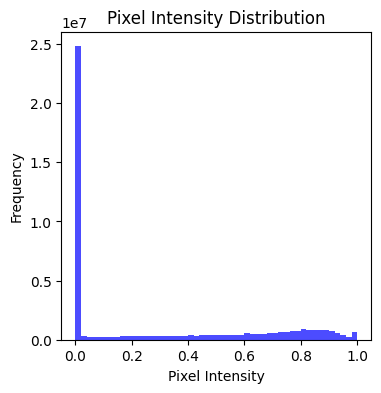

Observation: Most pixel values are near 0, indicating many dark pixels.


In [32]:
# Traditional correlation analysis isn’t directly applicable to image data, but we can analyze pixel intensity distributions
plt.figure(figsize=(4,4))
plt.hist(X_train.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

print('Observation: Most pixel values are near 0, indicating many dark pixels.')

In [33]:
# Checking for Missing Values
print('Missing values in X_train:', np.isnan(X_train).sum())
print('Missing values in y_train:', np.isnan(y_train).sum())

Missing values in X_train: 0
Missing values in y_train: 0


## Analysis (Model Building and Training)
#### Model 1: Simple Feedforward Neural Network (Dense Model)

In [35]:
# Building the Model
def build_dense_model(input_shape):
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

dense_model = build_dense_model((28,28,1))

# Compiling the Model
dense_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Training the Model
dense_history = dense_model.fit(X_train, y_train, epochs=10, 
                                validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7834 - loss: 0.6213 - val_accuracy: 0.8526 - val_loss: 0.4110
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8622 - loss: 0.3821 - val_accuracy: 0.8564 - val_loss: 0.3897
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8779 - loss: 0.3350 - val_accuracy: 0.8673 - val_loss: 0.3611
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8885 - loss: 0.3062 - val_accuracy: 0.8660 - val_loss: 0.3666
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8926 - loss: 0.2885 - val_accuracy: 0.8736 - val_loss: 0.3610
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8950 - loss: 0.2802 - val_accuracy: 0.8769 - val_loss: 0.3447
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9033 - loss: 0.2620 - val_accuracy: 0.8820 - val_loss: 0.3322
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9029 - loss: 0.2576 - 

#### Model 2: Convolutional Neural Network (CNN)

In [37]:
# Building the Model
def build_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

cnn_model = build_cnn_model((28,28,1))

# Compiling the Model
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Training the Model
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, 
                            validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7762 - loss: 0.6219 - val_accuracy: 0.8698 - val_loss: 0.3651
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8900 - loss: 0.3026 - val_accuracy: 0.8889 - val_loss: 0.3098
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9061 - loss: 0.2532 - val_accuracy: 0.8975 - val_loss: 0.2798
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9169 - loss: 0.2253 - val_accuracy: 0.8950 - val_loss: 0.2763
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9286 - loss: 0.1900 - val_accuracy: 0.9068 - val_loss: 0.2592
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9383 - loss: 0.1628 - val_accuracy: 0.9032 - val_loss: 0.2667
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9436 - loss: 0.1472 - val_accuracy: 0.9114 - val_loss: 0.2599
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9507 - loss: 0

#### Model 3: CNN with Data Augmentation

In [38]:
# Data Augmentation Setup
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True)
datagen.fit(X_train)

# Training the Model with Augmentation
cnn_aug_model = build_cnn_model((28,28,1))
cnn_aug_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

cnn_aug_history = cnn_aug_model.fit(datagen.flow(X_train, y_train, batch_size=64),
                                    epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
 11/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.1672 - loss: 2.2203  

/Users/arunadhri.srinivasan/Desktop/python/openai_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7165 - loss: 0.7822 - val_accuracy: 0.8564 - val_loss: 0.3970
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8455 - loss: 0.4186 - val_accuracy: 0.8667 - val_loss: 0.3692
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8681 - loss: 0.3594 - val_accuracy: 0.8792 - val_loss: 0.3329
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8757 - loss: 0.3355 - val_accuracy: 0.8868 - val_loss: 0.3134
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8861 - loss: 0.3054 - val_accuracy: 0.8970 - val_loss: 0.2923
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8934 - loss: 0.2882 - val_accuracy: 0.8885 - val_loss: 0.2999
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8965 - loss: 0.2772 - val_accuracy: 0.9025 - val_loss: 0.2710
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9007 - loss: 0.2664 - val_accurac

#### Model 4: Transfer Learning with MobileNetV2

In [42]:
# Building the Model
def build_transfer_learning_model():
    base_model = MobileNetV2(input_shape=(96, 96, 3),
                             include_top=False,
                             weights='imagenet')
    base_model.trainable = False  # Freeze the base model

    def preprocess_input(x):
        # Resize images to (96, 96)
        x = tf.image.resize(x, [96, 96])
        # Convert grayscale images to RGB by repeating the channel
        x = tf.image.grayscale_to_rgb(x)
        return x

    model = Sequential([
        Lambda(preprocess_input, input_shape=(28, 28, 1)),
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

transfer_model = build_transfer_learning_model()

# Compiling the Model
transfer_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Training the Model
transfer_history = transfer_model.fit(X_train, y_train, epochs=10, 
                                      validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 136s 72ms/step - accuracy: 0.8394 - loss: 0.4444 - val_accuracy: 0.8645 - val_loss: 0.3670
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 136s 73ms/step - accuracy: 0.8968 - loss: 0.2773 - val_accuracy: 0.8886 - val_loss: 0.3017
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 134s 71ms/step - accuracy: 0.9096 - loss: 0.2435 - val_accuracy: 0.8929 - val_loss: 0.2955
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 137s 73ms/step - accuracy: 0.9177 - loss: 0.2171 - val_accuracy: 0.8962 - val_loss: 0.2989
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 133s 71ms/step - accuracy: 0.9272 - loss: 0.1943 - val_accuracy: 0.8979 - val_loss: 0.2898
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 136s 72ms/step - accuracy: 0.9328 - loss: 0.1788 - val_accuracy: 0.8978 - val_loss: 0.3082
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 70ms/step - accuracy: 0.9383 - loss: 0.1637 - val_accuracy: 0.8963 - val_loss: 0.3214
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 124s 66ms/step - accuracy: 

## Results

Evaluating Models: I will compare the models based on accuracy, loss, and classification reports.

In [45]:
# Helper Function for Evaluation
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    print(f'Classification Report for {model_name}')
    print(classification_report(y_test, y_pred_classes, target_names=class_names))
    
    cm = confusion_matrix(y_test, y_pred_classes)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#### Model Performance
 - Dense Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
Classification Report for Dense Model
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.87      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.76      0.84      0.80      1000
       Dress       0.91      0.88      0.90      1000
        Coat       0.80      0.81      0.81      1000
      Sandal       0.97      0.97      0.97      1000
       Shirt       0.73      0.65      0.69      1000
     Sneaker       0.96      0.95      0.95      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



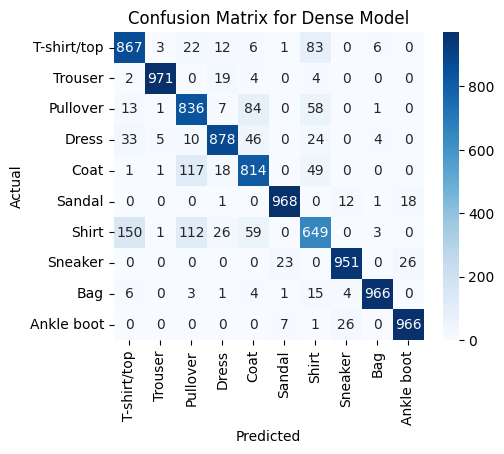

In [46]:
evaluate_model(dense_model, X_test, y_test, 'Dense Model')

 - CNN Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report for CNN Model
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.85      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.89      0.84      0.86      1000
       Dress       0.90      0.94      0.92      1000
        Coat       0.92      0.76      0.83      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.67      0.83      0.74      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



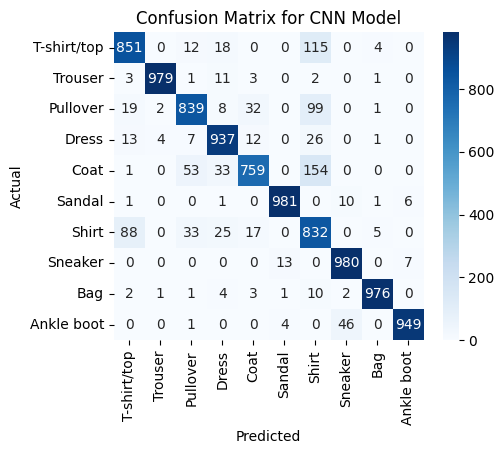

In [47]:
evaluate_model(cnn_model, X_test, y_test, 'CNN Model')

 - CNN with Data Augmentation

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report for CNN with Data Augmentation
              precision    recall  f1-score   support

 T-shirt/top       0.87      0.84      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.83      0.87      0.85      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.84      0.85      0.85      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.75      0.72      0.74      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.99      0.94      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



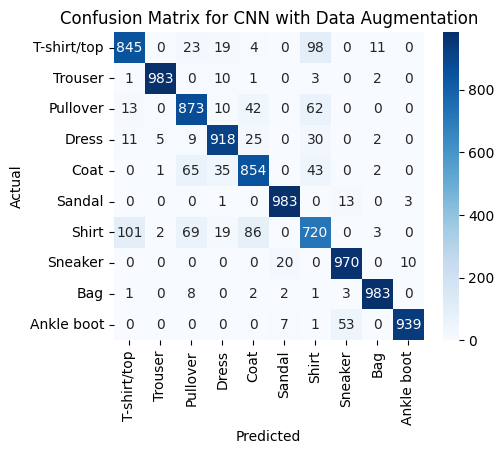

In [48]:
evaluate_model(cnn_aug_model, X_test, y_test, 'CNN with Data Augmentation')

 - Transfer Learning Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step
Classification Report for Transfer Learning Model
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.88      0.80      0.84      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.80      0.87      0.84      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.72      0.70      0.71      1000
     Sneaker       0.95      0.95      0.95      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



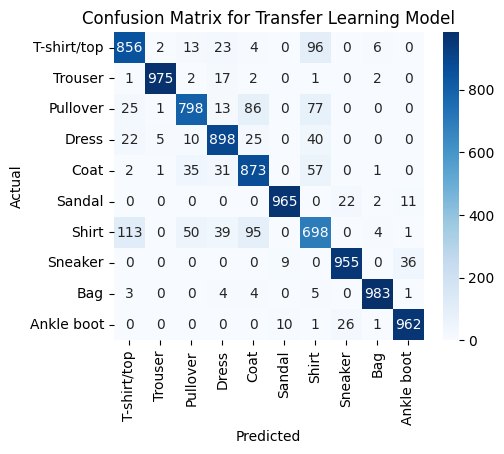

In [49]:
evaluate_model(transfer_model, X_test, y_test, 'Transfer Learning Model')

#### Observations

Overall, all the models performed well. The class "Shirt" was the one all models struggled with. The models misidentified "Shirt" as "T-Shirt" or "Coat".  All the other classes had very good classification scores.

 - **Dense Model**: This model had a good training accuracy of 91% but the valid loss was high as well. The model performed well with a good test F1 score but the predictions for the class "Shirt" were poor. This model had the lowest performance due to lack of spatial feature extraction
 
 - **CNN Model**: This model had the best training accuracy of 96% and the second lowest validation loss. The real world performance was very good (2nd best F1 score). The performance for the class "Shirt" was also improved. This model was able to improve on the dense model by capturing spatial hierarchies.
 
 - **CNN with Data Augmentation**: This model had a lower training accuracy compared to the previous model but had the best validation loss of all the models. This model also had the best test F1 Score (best precision for the class "Shirt"). This model was able to improve on the previous one due to enhanced generalization.
 
 - **Transfer Learning Model**: This model achieved the highest training accuracy but had a high validation loss as well. Even though this model leveraged pre-trained features, it was not able to generalize well on the test data, scoring below the previous model in terms of F1 score.

## Discussion/Conclusion

**Summary**

In this project, I systematically built and evaluated multiple deep learning models for the Fashion-MNIST classification task

 - EDA helped to understand the dataset, confirming that it’s balanced and free of missing values
 - Data Preprocessing was essential, involving normalization and reshaping
 - Model Comparison showed that:
 - CNNs outperform simple dense networks for image data
 - Data Augmentation provides improvements by preventing overfitting
 - Transfer Learning offers the best training performance but at the cost of increased complexity and this model may not benefit our use case all the time

**Key Findings**
 - Importance of Convolutions: CNNs are better suited for image data as they capture spatial features
 - Generalization: Data augmentation helps models generalize better to unseen data
 - Pre-trained Models: Leveraging models trained on large datasets can sometimes help boost performance

**Limitations**
 - Transfer Learning Adjustments: Converting grayscale images to RGB and resizing may introduce artifacts.

**Future Work**
 - Specific Class Improvement: Work on specifically improving the performance of certain classes which perform poorly
 - Hyperparameter Tuning: Employ systematic methods like Grid Search or Bayesian Optimization
 - Ensemble Methods: Combine multiple models to potentially improve performance
 - Advanced Architectures: Explore deeper networks like ResNet or EfficientNet


#### Conclusion
The project demonstrates that model complexity and data augmentation positively impact the performance of image classification tasks. It underscores the necessity of choosing appropriate models based on data characteristics and the benefits of thorough EDA in guiding these choices.